In [1]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:
train = pd.read_csv('/content/gdrive/MyDrive/ColabNotebooks/train.csv')

In [4]:
train.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [5]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [6]:
train.shape

(20800, 5)

In [7]:
train.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [8]:
train = train.fillna('')

In [9]:
train['content'] = train['author']+' '+ train['title']

In [10]:
X = train.drop(columns='label', axis=1)
y = train['label']

In [11]:
X.head()

,id,title,author,text,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",Consortiumnews.com Why the Truth Might Get You...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,Howard Portnoy Iranian woman jailed for fictio...


In [12]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [13]:
def apply_stemming(content, stemmer):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [stemmer.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [14]:
stemmer = PorterStemmer()
train['content'] = train['content'].apply(lambda content: apply_stemming(content, stemmer))

In [15]:
train['content'].head()

0    darrel lucu hous dem aid even see comey letter...
1    daniel j flynn flynn hillari clinton big woman...
2               consortiumnew com truth might get fire
3    jessica purkiss civilian kill singl us airstri...
4    howard portnoy iranian woman jail fiction unpu...
Name: content, dtype: object

In [16]:
X = train['content'].values
y = train['label'].values

In [17]:
X.shape

(20800,)

In [18]:
y.shape

(20800,)

In [19]:
vectorizer = TfidfVectorizer(max_features=9000)
vectorizer.fit(X)

X = vectorizer.transform(X)
X.shape

(20800, 9000)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from sklearn.utils import shuffle
import joblib

In [22]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

In [23]:
# Train a Logistic Regression model with the best hyperparameters
best_logistic_regression = LogisticRegression(solver='liblinear', **best_params)
best_logistic_regression.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_logistic_regression.predict(X_test)

In [24]:
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_report}")

Best Hyperparameters: {'C': 100, 'penalty': 'l1'}
Accuracy: 0.9918269230769231
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2077
           1       0.99      0.99      0.99      2083

    accuracy                           0.99      4160
   macro avg       0.99      0.99      0.99      4160
weighted avg       0.99      0.99      0.99      4160



In [25]:
class Callback:
    def __init__(self):
        self.train_losses = []
        self.val_losses = []
        self.train_accuracies = []
        self.val_accuracies = []

    def on_epoch_end(self, model, X_train, y_train, X_val, y_val):
        train_pred = model.predict_proba(X_train)
        val_pred = model.predict_proba(X_val)

        train_loss = log_loss(y_train, train_pred)
        val_loss = log_loss(y_val, val_pred)

        train_acc = accuracy_score(y_train, np.argmax(train_pred, axis=1))
        val_acc = accuracy_score(y_val, np.argmax(val_pred, axis=1))

        self.train_losses.append(train_loss)
        self.val_losses.append(val_loss)
        self.train_accuracies.append(train_acc)
        self.val_accuracies.append(val_acc)

In [26]:
callback = Callback()

# Поділ даних на тренувальні та валідаційні
X_train_shuffled, y_train_shuffled = shuffle(X_train, y_train, random_state=42)
split_idx = int(0.8 * X_train_shuffled.shape[0])  # Використання shape замість len
X_train_sub = X_train_shuffled[:split_idx]
y_train_sub = y_train_shuffled[:split_idx]
X_val_sub = X_train_shuffled[split_idx:]
y_val_sub = y_train_shuffled[split_idx:]

model = LogisticRegression(solver='liblinear', **best_params)

for epoch in range(100):  # Кількість епох
    model.fit(X_train_sub, y_train_sub)
    callback.on_epoch_end(model, X_train_sub, y_train_sub, X_val_sub, y_val_sub)

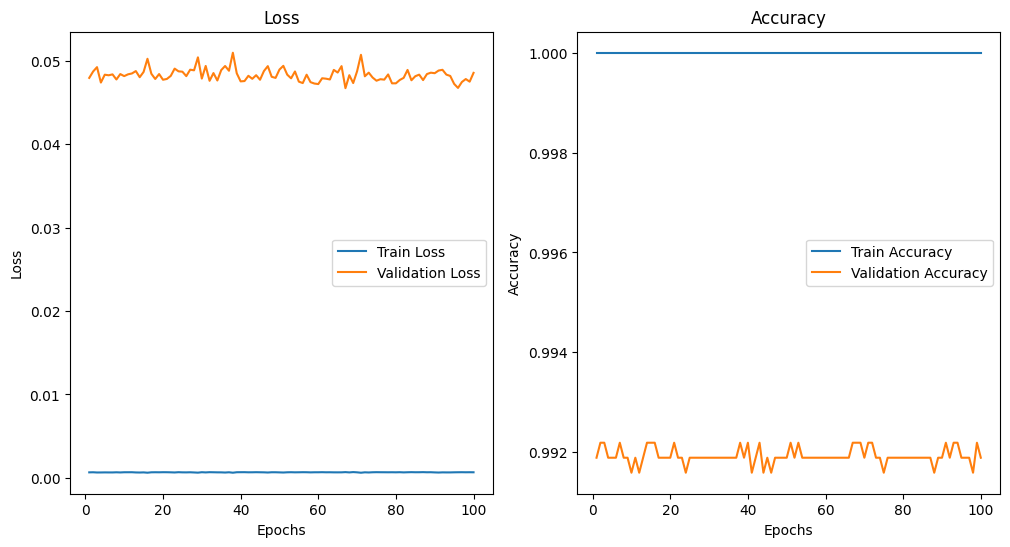

In [27]:
# Виведення графіків точності та втрат
epochs = range(1, len(callback.train_losses) + 1)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, callback.train_losses, label='Train Loss')
plt.plot(epochs, callback.val_losses, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, callback.train_accuracies, label='Train Accuracy')
plt.plot(epochs, callback.val_accuracies, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [28]:
print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_report}")

Best Hyperparameters: {'C': 100, 'penalty': 'l1'}
Accuracy: 0.9918269230769231
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2077
           1       0.99      0.99      0.99      2083

    accuracy                           0.99      4160
   macro avg       0.99      0.99      0.99      4160
weighted avg       0.99      0.99      0.99      4160



In [29]:
val_data = pd.read_csv('/content/gdrive/MyDrive/ColabNotebooks/test.csv')
val_data.shape

(5200, 4)

In [31]:
val_data = val_data.fillna('')

In [32]:
val_data['content'] = val_data['author']+' '+ val_data['title']

In [33]:
X_val = val_data['content'].values

In [34]:
vectorizer = TfidfVectorizer(max_features=9000)
vectorizer.fit(X_val)

X_val = vectorizer.transform(X_val)

In [35]:
X_val.shape

(5200, 9000)

In [36]:
y_val_pred = best_logistic_regression.predict(X_val)

In [37]:
y_val_pred.shape

(5200,)

In [38]:
# Evaluate the model
submit_df = pd.read_csv('/content/gdrive/MyDrive/ColabNotebooks/submit.csv')
y_val_test = submit_df['label']
accuracy = accuracy_score(y_true=y_val_test, y_pred=y_val_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy: {accuracy}")

Best Hyperparameters: {'C': 100, 'penalty': 'l1'}
Accuracy: 0.5436538461538462


In [39]:
final_sub = pd.DataFrame()
final_sub['id']=submit_df['id']
final_sub['label'] = y_val_pred
final_sub.to_csv('submission.csv',index=False)

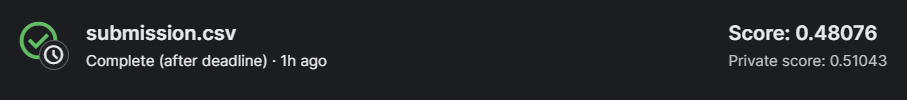

<h1>BERT</h1>

In [40]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertModel, AdamW, get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

In [41]:
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'
print(device)

cuda


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [42]:
def load_data(data_file):
    df = pd.read_csv(data_file)
    df = df.fillna('')
    df['combined_text'] = df['author'] + df['title'] + df['text']
    texts = df['combined_text'].tolist()
    print(df['combined_text'].head(5))
    labels = df['label'].tolist()
    return texts, labels

In [43]:
data_file = "/content/gdrive/MyDrive/ColabNotebooks/train.csv"
texts, labels = load_data(data_file)

0    Darrell LucusHouse Dem Aide: We Didn’t Even Se...
1    Daniel J. FlynnFLYNN: Hillary Clinton, Big Wom...
2    Consortiumnews.comWhy the Truth Might Get You ...
3    Jessica Purkiss15 Civilians Killed In Single U...
4    Howard PortnoyIranian woman jailed for fiction...
Name: combined_text, dtype: object


In [44]:
class TextClassificationDataset(Dataset):
  def __init__(self, texts, labels, tokenizer, max_length):
          self.texts = texts
          self.labels = labels
          self.tokenizer = tokenizer
          self.max_length = max_length
  def __len__(self):
          return len(self.texts)
  def __getitem__(self, idx):
          text = self.texts[idx]
          label = self.labels[idx]
          encoding = self.tokenizer(text, return_tensors='pt', max_length=self.max_length, padding='max_length', truncation=True)
          return {'input_ids': encoding['input_ids'].flatten(), 'attention_mask': encoding['attention_mask'].flatten(), 'labels': torch.tensor(label)}

In [45]:
class BERTClassifier(nn.Module):
  def __init__(self, bert_model_name, num_classes):
        super(BERTClassifier, self).__init__()
        self.bert = BertModel.from_pretrained(bert_model_name)
        self.dropout = nn.Dropout(0.1)
        self.fc = nn.Linear(self.bert.config.hidden_size, num_classes)

  def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        x = self.dropout(pooled_output)
        logits = self.fc(x)
        return logits

In [46]:
def train(model, data_loader, optimizer, scheduler, device, save_path, num_epoch):
    model.train()
    loss_values = []  # Список для зберігання значень лоссу
    for batch_idx, batch in enumerate(data_loader):
        optimizer.zero_grad()

        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        # Forward pass
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)

        # Assuming the outputs are logits directly
        logits = outputs

        # Compute loss
        loss = torch.nn.CrossEntropyLoss()(logits, labels)
        loss.backward()
        optimizer.step()
        scheduler.step()

        # Збереження лоссу
        loss_values.append(loss.item())

    # Збереження моделі після кожної ітерації
    model_save_path = os.path.join(save_path, f"model_epoch_{num_epoch}.pt")
    torch.save(model.state_dict(), model_save_path)
    print(f"Model saved after epoch {num_epoch} at {model_save_path}")

    # Return loss values for further analysis
    return loss_values

In [47]:
def evaluate(model, data_loader, device):
    model.eval()
    predictions = []
    actual_labels = []
    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            _, preds = torch.max(outputs, dim=1)
            predictions.extend(preds.cpu().tolist())
            actual_labels.extend(labels.cpu().tolist())
    return accuracy_score(actual_labels, predictions), classification_report(actual_labels, predictions)

In [49]:
def predict_sentiment(text, model, tokenizer, device, max_length=128):
    model.eval()
    encoding = tokenizer(text, return_tensors='pt', max_length=max_length, padding='max_length', truncation=True)
    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)

    with torch.no_grad():
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            _, preds = torch.max(outputs, dim=1)
    return "reliable" if preds.item() == 0 else "fake"

In [48]:
 bert_model_name = 'bert-base-uncased'
 num_classes = 2
 max_length = 128
 batch_size = 16
 num_epochs = 4
 learning_rate = 2e-5


In [50]:
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.2, random_state=42)

In [51]:
tokenizer = BertTokenizer.from_pretrained(bert_model_name)
train_dataset = TextClassificationDataset(train_texts, train_labels, tokenizer, max_length)
val_dataset = TextClassificationDataset(val_texts, val_labels, tokenizer, max_length)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [52]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BERTClassifier(bert_model_name, num_classes).to(device)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [53]:
optimizer = AdamW(model.parameters(), lr=learning_rate)
total_steps = len(train_dataloader) * num_epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:521: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
torch.save(model.state_dict(), "/content/gdrive/MyDrive/ColabNotebooks/saved_model/bert_classifier.pth")

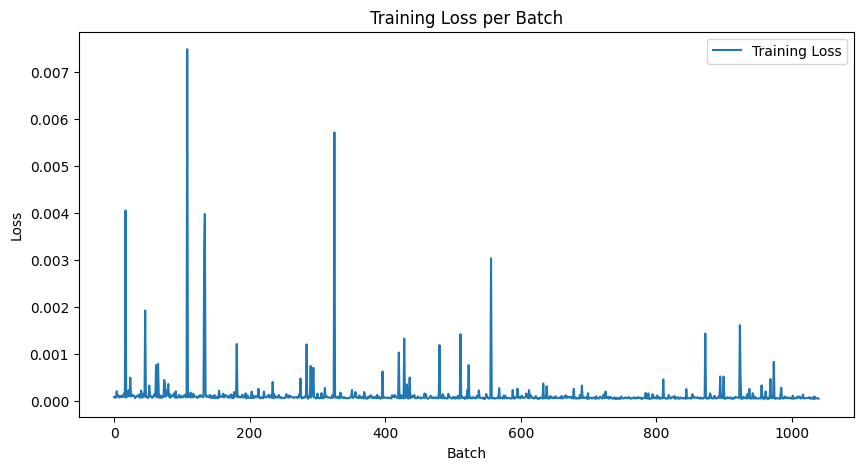

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history, label='Training Loss')
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.title('Training Loss per Batch')
plt.legend()
plt.show()

In [ ]:
history = []
accuracy_history = []
path = "/content/gdrive/MyDrive/ColabNotebooks/saved_model"
for epoch in range(num_epochs):
        print(f"Epoch {epoch + 1}/{num_epochs}")
        history = train(model, train_dataloader, optimizer, scheduler, device, path, epoch )
        accuracy, report = evaluate(model, val_dataloader, device)
        print(f"Validation Accuracy: {accuracy:.4f}")
        print(report)
        accuracy_history.append(accuracy)


Epoch 1/4
Model saved after epoch 0 at /content/gdrive/MyDrive/ColabNotebooks/saved_model/model_epoch_0.pt
Validation Accuracy: 0.9988
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2132
           1       1.00      1.00      1.00      2028

    accuracy                           1.00      4160
   macro avg       1.00      1.00      1.00      4160
weighted avg       1.00      1.00      1.00      4160

Epoch 2/4
Model saved after epoch 1 at /content/gdrive/MyDrive/ColabNotebooks/saved_model/model_epoch_1.pt
Validation Accuracy: 0.9988
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2132
           1       1.00      1.00      1.00      2028

    accuracy                           1.00      4160
   macro avg       1.00      1.00      1.00      4160
weighted avg       1.00      1.00      1.00      4160

Epoch 3/4
Model saved after epoch 2 at /content/gdrive/MyDrive/ColabNotebook

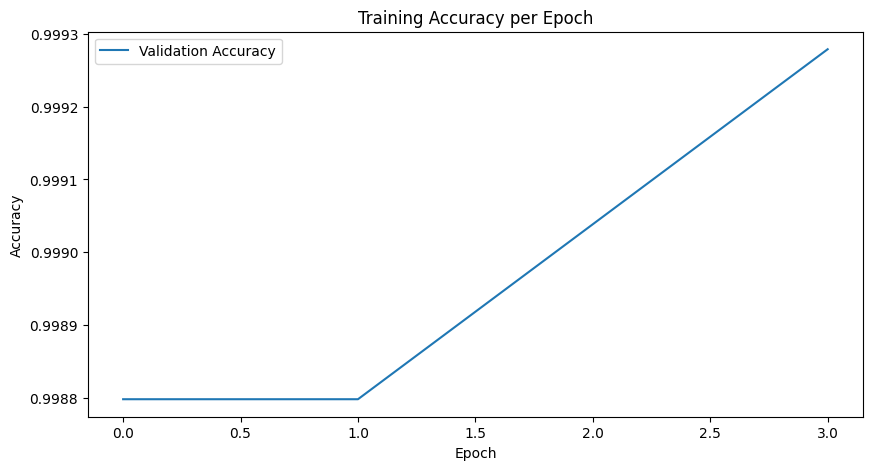

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(accuracy_history, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy per Epoch')
plt.legend()
plt.show()

In [54]:
load_path = "/content/gdrive/MyDrive/ColabNotebooks/saved_model/model_epoch_3.pt"

model.load_state_dict(torch.load(load_path))

<All keys matched successfully>

In [57]:
def load_data_test(data_file):
    df = pd.read_csv(data_file)
    df = df.fillna('')
    df['combined_text'] = df['author'] + df['title'] + df['text']
    texts = df['combined_text'].tolist()
    return texts

In [58]:
data_file = "/content/gdrive/MyDrive/ColabNotebooks/test.csv"
texts_test = load_data_test(data_file)

In [63]:
def predict_sentiment_list(texts, model, tokenizer, device, max_length=128, batch_size=32):
    model.eval()
    predictions = []

    # Обробка текстів по батчам
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i + batch_size]
        encoding = tokenizer(batch_texts, return_tensors='pt', max_length=max_length, padding=True, truncation=True)
        input_ids = encoding['input_ids'].to(device)
        attention_mask = encoding['attention_mask'].to(device)

        with torch.no_grad():
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            _, preds = torch.max(outputs, dim=1)
            batch_predictions = [0 if pred == 0 else 1 for pred in preds]
            predictions.extend(batch_predictions)

    return predictions


In [64]:
sentiments = predict_sentiment_list(texts_test, model, tokenizer, device)

In [65]:
print(sentiments)

[0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 

In [66]:
submit_df = pd.read_csv('/content/gdrive/MyDrive/ColabNotebooks/submit.csv')

In [68]:
final_sub = pd.DataFrame()
final_sub['id']=submit_df['id']
final_sub['label'] = sentiments
final_sub.to_csv('submission2.csv',index=False)

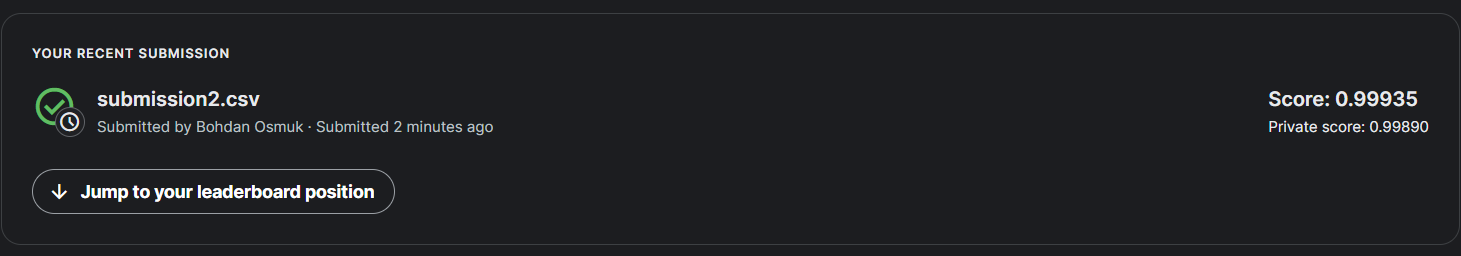